In [1]:
#04_Numpy_08_20160513

In [2]:
#Random Number Generation

In [3]:
#numpy.random module

In [4]:
import numpy as np #import numpy as np

In [5]:
samples=np.random.normal(size=(4,4)) 
# a 4x4 array from the standard normal distribution using normal() 

In [6]:
samples

array([[ 0.86396931,  0.64830174,  0.30379312, -1.02220925],
       [-0.367619  , -0.9850185 , -0.10118476,  0.8421859 ],
       [ 1.41530916, -0.39879741, -0.31463756, -0.68191928],
       [-0.38975395, -0.46639388,  0.54805832,  0.51139255]])

In [7]:
#比較 Python 標準模組 random 與 numpy.random 的速度

In [8]:
from random import normalvariate #from std. liberary random import normalvariate 

In [9]:
N=1000000

In [10]:
# %timeit 計時

In [11]:
%timeit samples=[normalvariate(0, 1) for _ in range(N)] #range() <-- python3, xrange() <-- python2

1 loop, best of 3: 796 ms per loop


In [12]:
%timeit np.random.normal(size=N) #使用 numpy.random.normal 產生樣本

10 loops, best of 3: 27.3 ms per loop


In [13]:
#example: Random Walks

In [14]:
#A pure Python way to implement a single random
#walk with 1,000 steps using the built-in random module

In [15]:
import random #import std. module random

In [16]:
position=0

In [17]:
walk=[position]

In [18]:
steps=1000

In [19]:
for i in range(steps):      #std. liberary range() function, python2-->xrange()
    step=1 if random.randint(0,1) else -1 #random.randint()
    position += step
    walk.append(position) #list object walk.append() method

In [20]:
#繪圖說明

In [21]:
import matplotlib.pyplot as plt #import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

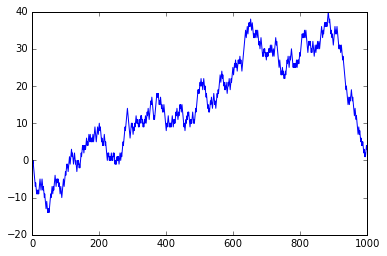

In [23]:
plt.plot(walk)

In [24]:
#以下分解說明

In [25]:
for i in range(10):
    print(random.randint(0,1))

1
0
1
0
0
0
1
0
1
1


In [26]:
for i in range(10):                     #將 random.randint(0,1) true/false
    st=1 if random.randint(0,1) else -1 #轉為 1,-1
    print(st)

1
-1
1
-1
-1
-1
-1
-1
-1
-1


In [27]:
#random walk, 使用 numpy.random, numpy.random.randint()

In [28]:
nsteps=1000 #設定 1000 步

In [29]:
draws=np.random.randint(0,2,size=nsteps) #產生1000個 0或1 的numpy.ndarray object draws

In [30]:
steps=np.where(draws > 0,1,-1) #以np.where() function將 draws中 1-->1, 0-->-1

In [31]:
walk=steps.cumsum() #method cumsum() 

In [32]:
#繪圖

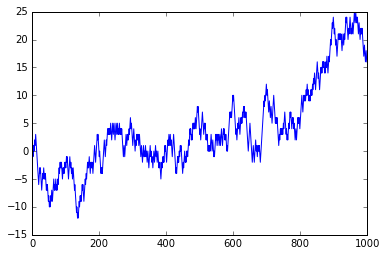

In [33]:
plt.plot(walk)

In [34]:
#利用min()/max() method, 求最小/最大值,隨機漫步統計分析

In [35]:
walk.min() #利用 min() method, 求最小值

-12

In [36]:
walk.max() #利用 max() method, 求最大值

25

In [7]:
# 隨機漫步統計分析 複雜範例: first crossing time

In [8]:
(np.abs(walk) >= 10).argmax() #np.abs() function 逐一求 walk 中元素絕對值
                              #(np.abs(walk)>=10) 將傳回 True or False
                              #第一個 True 的索引值,以 argmax() method 求出    

NameError: name 'walk' is not defined

In [39]:
#分解說明 , np.random.randint()

In [40]:
for i in range(10):  #走10圈
    print(np.random.randint(0,2)) #np.random.randint(0,2) -->隨機整數值 0,1

0
1
1
1
0
1
0
1
1
0


In [41]:
#numpy.ndarray object 的 cumsum() method 使用說明-->04_cumsum_20160514.ipynb

In [42]:
#example3: Simulating Many Random Walks at Once

In [43]:
nwalks=5000 #5000 個隨機漫步

In [44]:
nsteps=1000 #1000 步

In [45]:
draws=np.random.randint(0,2,size=(nwalks,nsteps)) # 5000x1000 ndarray, 元素值為0 or 1 

In [46]:
steps=np.where(draws>0,1,-1) #將 0-->-1, 1-->1

In [47]:
walks=steps.cumsum(1) #沿 axis1 cumsum, (每一個隨機漫步,共5000個)

In [48]:
walks #每一個隨機漫步,共5000個

array([[ -1,  -2,  -1, ...,  18,  17,  16],
       [  1,   2,   3, ...,  -2,  -1,   0],
       [ -1,   0,  -1, ..., -12, -11, -10],
       ..., 
       [  1,   0,   1, ...,  16,  15,  16],
       [  1,   2,   3, ...,  22,  21,  20],
       [ -1,   0,   1, ...,  20,  21,  22]], dtype=int32)

In [49]:
#統計所有隨機漫步,walks 中 max/min

In [50]:
walks.max()

116

In [54]:
walks.min()

-111

In [56]:
#first crossing time,compute the minimum crossing time to 30 or -30

In [57]:
#但並不是所有5000次皆有穿越30,需先使用any() methond 檢驗

In [67]:
hits30=(np.abs(walks)>=30).any(1) #any(1), 沿axis1 使用 any(), 
                                  #即檢查每次隨機漫步中 有任一穿越30者為true
                                  #共檢查5000次

In [68]:
hits30 #一個布林值陣列, 大小為 5000

array([ True, False,  True, ..., False,  True,  True], dtype=bool)

In [69]:
hits30.sum() #統計true (穿越30) 的個數

3399

In [70]:
crossing_times=(np.abs(walks[hits30])>=30).argmax(1) #每個穿越點
                                                     #說明-->999

In [71]:
crossing_times

array([483, 861, 831, ..., 849, 201, 181], dtype=int64)

In [72]:
crossing_times.mean() #求平均 

501.62077081494556

In [73]:
#用其他分布方式得到漫步數據,如 numpy.random.normal() 

In [74]:
#999 --> 分解說明 (np.abs(walks[hits30])>=30).argmax(1) 

In [75]:
walks #5000x1000, axis1是已經cumsum,

array([[ -1,  -2,  -1, ...,  18,  17,  16],
       [  1,   2,   3, ...,  -2,  -1,   0],
       [ -1,   0,  -1, ..., -12, -11, -10],
       ..., 
       [  1,   0,   1, ...,  16,  15,  16],
       [  1,   2,   3, ...,  22,  21,  20],
       [ -1,   0,   1, ...,  20,  21,  22]], dtype=int32)

In [76]:
hits30 #布林陣列

array([ True, False,  True, ..., False,  True,  True], dtype=bool)

In [77]:
walks[hits30] #walks陣列與 hits30布林陣列運算, true的元素才出現

array([[ -1,  -2,  -1, ...,  18,  17,  16],
       [ -1,   0,  -1, ..., -12, -11, -10],
       [  1,   2,   3, ...,  30,  31,  30],
       ..., 
       [ -1,  -2,  -1, ..., -28, -27, -26],
       [  1,   2,   3, ...,  22,  21,  20],
       [ -1,   0,   1, ...,  20,  21,  22]], dtype=int32)

In [78]:
crossing_times=(np.abs(walks[hits30])>=30).argmax(1) #argmax(1),沿著axis1
                                                     #找到第一個穿越30元素的 index
                                                     #每一個axis0 會找到一個,共3399
                                                     #個,形成一個一維陣列

In [79]:
crossing_times

array([483, 861, 831, ..., 849, 201, 181], dtype=int64)